
* 5 - What is the cumulated proportion of variance explained (PVE) in the first two components?
* 6 - How many components should we keep to retain 80%, 90%, 95% and 99% of the variance explained?

In [1]:
#### ISSUES ###
# 1. why is there an 'allow_pickle' key ?
# 2. 

In [2]:
import numpy as np
import os

# Load data
with np.load('cifar4-train.npz', allow_pickle=False) as npz_file:
    # Load items into a dictionary
    cifar = dict(npz_file.items())


print(cifar.keys())

dict_keys(['pixels', 'overfeat', 'labels', 'names', 'allow_pickle'])


In [3]:
# 1 - Print the class distribution, i.e., the proportion of images in each category.
labels = cifar['labels']
import pandas as pd
pd.value_counts(labels, normalize=True)

3    0.25
2    0.25
1    0.25
0    0.25
dtype: float64

In [4]:
# 2 - What is the accuracy of the "most-frequent" baseline?
# the accuracy of the most-frequent baseline is 1/4, as the distribution is uniform between the 4 labels.

flat array shape (5000, 3072)
re-shaped array (32, 32, 3)


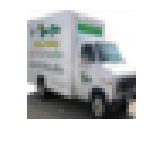

truck


In [5]:
# 3 - Plot a few images from the data set, e.g., ten images from each category.

# load data from the input matrix with the flat vectors of pixels
flat_img = cifar['pixels']
print('flat array shape',flat_img.shape)

# Reshape the "flat vector" of the first array into a 32x32x3 array 
img = flat_img[0].reshape(32, 32, 3)
print('re-shaped array',img.shape)

#plot image
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2)) # 2 by 2 figure (in inches)
plt.imshow(img)
plt.axis('off') # Hide the x- and y-axis
plt.show()
print(cifar['names'][labels[0]])

In [6]:
# Function to plot the i-th image from some X/y arrays
def show_image(idx, X, y):
    # Print its label
    label = y[idx]
    print('Label: {} ({})'.format(
        label,
        cifar['names'][label] # Class name
    ))
    
    # Get image pixels
    flat_img = X[idx] # has shape (3072,)
    
    # Reshape the "flat vector" into a 32x32x3 array 
    img = flat_img.reshape(32, 32, 3)
    
    # Plot the image
    plt.figure(figsize=(2,2)) # 2 by 2 figure (in inches)
    plt.imshow(img)
    plt.axis('off') # Hide the x- and y-axis
    plt.show()

Label: 3 (ship)


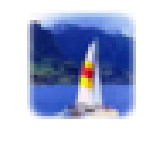

Label: 1 (car)


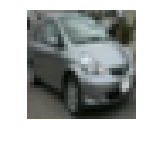

Label: 0 (truck)


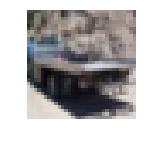

Label: 1 (car)


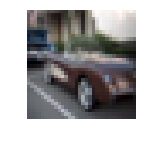

Label: 2 (airplane)


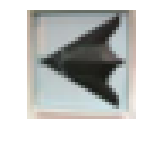

Label: 3 (ship)


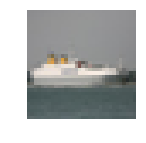

Label: 2 (airplane)


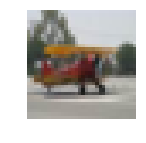

Label: 3 (ship)


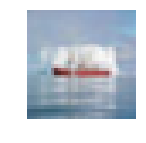

Label: 2 (airplane)


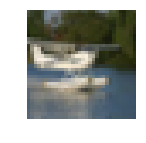

Label: 0 (truck)


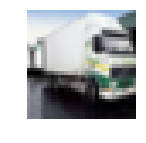

In [7]:
import random
for x in range(10):
  show_image(random.randint(1,5000),cifar['pixels'], cifar['labels']) 

In the unit about PCA, we saw how to create a scree plot for the wine data set which has 13 features. We plotted the proportion of variance explained for each principal component with a bar chart and the cumulative sum with a "step curve". This time, the number of principal components is much larger, and it won't be possible to use this approach. Instead, plot the cumulative sum with the Pyplot plot() function.

Note that it's not necessary to plot all the principal components. In particular, you can plot a subset of the components if you observe that they contain most of the variance. For instance, if you observe that the first hundred components contain 95% of the cumulated PVE, you can decide to limit your scree plot to this number of components.

Finally, apply PCA to create 2d plots of the input data.

Create a 2d plot of the OverFeat features.
Create a 2d plot using the matrix of image pixels.
To achieve this, compute the two principal components using the entire train set with the 5,000 data points. Use these components to plot a subset of the data points, e.g., 500. Use different colors or markers for each class to better identify them. Write your observations in a markdown cell under each plot.

In [9]:
# 4 - Create a scree plot of the OverFeat features.
# Create X/y arrays
X = cifar['overfeat'].astype(np.float32)
y = cifar['labels'].astype(np.float32)

print('X:', X.shape)
print('y:', y.shape)

X: (5000, 4096)
y: (5000,)


In [10]:
# Rescale the data
from sklearn.preprocessing import StandardScaler

# Create Standard scaler
scaler = StandardScaler()

# Rescale data
X_rescaled = scaler.fit_transform(X)

In [12]:
# Create PCA transformer
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

# Apply PCA to rescaled data
pca.fit(X_rescaled)

# Proportion of variance explained
pve = pca.explained_variance_ratio_
pve.shape

(4096,)

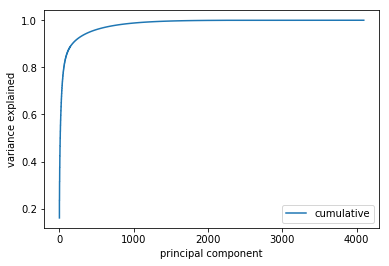

In [17]:
# Cumulative sum
pve_cumsum = np.cumsum(pve)
plt.step(
    np.arange(1, len(pve) + 1),
    pve_cumsum, # Cumulative sum
    label='cumulative'
)

# Add labels
plt.xlabel('principal component')
plt.ylabel('variance explained')
plt.legend()
plt.show()

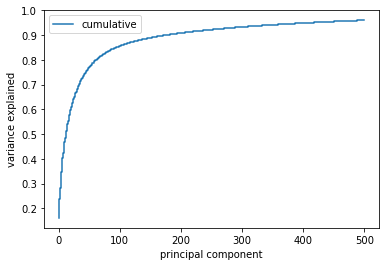

In [22]:
# Cumulative sum, limit to first 500 components
pve_cumsum = np.cumsum(pve)
plt.step(
    np.arange(1, 500),
    pve_cumsum[:499], # Cumulative sum
    label='cumulative'
)

# Add labels
plt.xlabel('principal component')
plt.ylabel('variance explained')
plt.legend()
plt.show()